
# WE11-Autoencoder

**Q1.Create 5 28x28 pixel images of the first letter of your first name to be used for training. For instance, if the first character of your name is K, then create 5 versions of K and save these as 5 different 28x28 images.**

**Created 5 versions of G letter with image size of 28x28 images**

**Q2. Create a notebook. Load the MNIST dataset (see the tutorial from class) and the supplied autencoder (digits.a5). Display the predictions for several random digits and compare these to the original.**

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image

## 1.0 Load and normalize our data

In [2]:
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [3]:
# Count the number of occurrences of each digit in the training set
digit_counts = [0] * 10
for y in y_train:
  digit_counts[y] += 1

# Print the results
for i in range(10):
    print(f"Digit {i}: {digit_counts[i]}")


Digit 0: 5923
Digit 1: 6742
Digit 2: 5958
Digit 3: 6131
Digit 4: 5842
Digit 5: 5421
Digit 6: 5918
Digit 7: 6265
Digit 8: 5851
Digit 9: 5949


In [4]:
# Count the number of occurrences of each digit in the training set
digit_counts = [0] * 10
for y in y_test:
  digit_counts[y] += 1

# Print the results
for i in range(10):
    print(f"Digit {i}: {digit_counts[i]}")


Digit 0: 980
Digit 1: 1135
Digit 2: 1032
Digit 3: 1010
Digit 4: 982
Digit 5: 892
Digit 6: 958
Digit 7: 1028
Digit 8: 974
Digit 9: 1009


In [5]:
## Flatten images for autoencoder input (28x28 is 784 -- therefore, input is 784 neurons)
x_train = np.reshape(x_train, (-1, 784))
x_test = np.reshape(x_test, (-1, 784))
print(x_train.shape)
print(x_test.shape)
# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

(60000, 784)
(10000, 784)


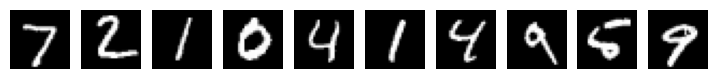

In [6]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

## 2.0 Load our pretrained digit.a5 model

In [7]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

#### **Predictions for several random digits and compare these to the original**

313/313 [==============================] - 2s 5ms/step


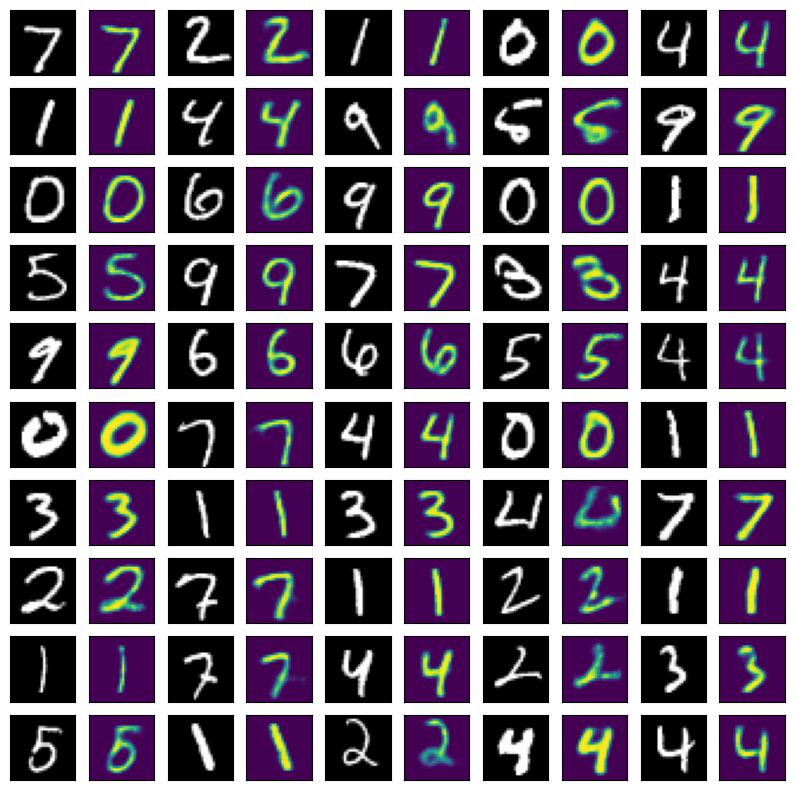

In [8]:
reconstructed_images = pretrained_model.predict(x_test)

images = []
for i in range(100):
    images.append(x_test[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

**Q3. Create a new autoencoder, and train this autoencoder with the MNIST dataset, with your new images added (don't forget to oversample these images. Add enough copies to the MNIST dataset so that your model can identify your new character).**

## Create a new autoencoder, and train this autoencoder with the MNIST dataset and with your new images added

1/1 [==============================] - 0s 23ms/step


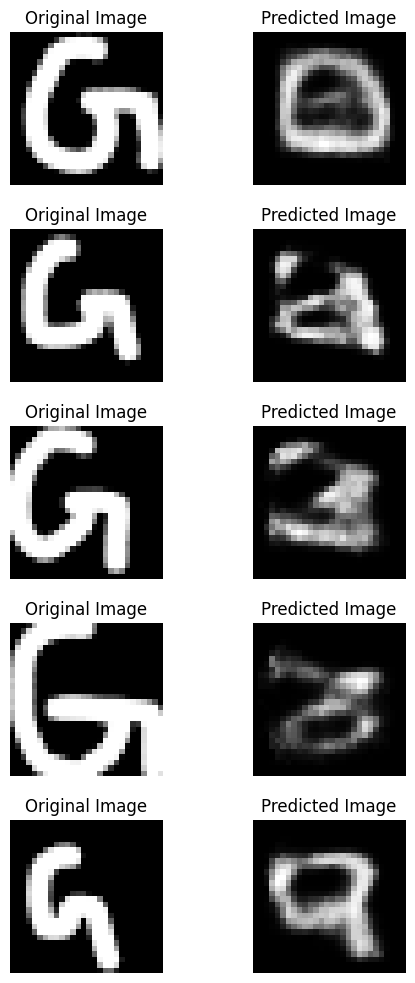

In [9]:
#added my 5 new images and predicted with pretrained model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the list of image paths
image_paths = ['G1.png', 'G2.png', 'G3.png', 'G4.png', 'G5.png']

# Set up the plot
fig, axs = plt.subplots(5, 2, figsize=(5, 10))
fig.tight_layout()

# Loop over the image paths
for i, path in enumerate(image_paths):
    # Load the image
    img = tf.keras.utils.load_img(path, target_size=(28, 28), color_mode='grayscale')

    # Preprocess the image
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr / 255.0
    input_arr = input_arr.reshape(784)
    input_arr = np.array([input_arr])

    # Make predictions
    predictions = pretrained_model.predict(input_arr)

    # Display the images and predictions
    axs[i, 0].imshow(img, cmap='gray')
    axs[i, 0].axis('off')
    axs[i, 0].set_title('Original Image')
    axs[i, 1].imshow(predictions[0].reshape(28, 28), cmap='gray')
    axs[i, 1].axis('off')
    axs[i, 1].set_title('Predicted Image')

plt.show()


In [10]:
print(x_train.shape)

(60000, 784)


In [11]:
print(x_test.shape)

(10000, 784)


x_train.shape =60000

lets assume each number 6000

G contribution also 6000

60000/6000 = 10

10*5images = 50

Number of copies = 60000/50 =1200*5 images =6000 G images


In [12]:
# Define additional images to add to dataset
image_paths = ['G1.png', 'G2.png', 'G3.png', 'G4.png', 'G5.png']

# Load additional images and oversample them to create a larger dataset
x_additional = []
for path in image_paths:
    img = tf.keras.preprocessing.image.load_img(path, color_mode='grayscale', target_size=(28, 28))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img.reshape(784) / 255.0
    x_additional.append(img)

# Add copies of additional images to the dataset
num_copies = int(x_train.shape[0] / 50)
x_additional = np.array(x_additional * num_copies)
x_train = np.vstack((x_train, x_additional))


In [13]:
print(x_train.shape[0])

66000


x_test.shape = 10000

lets asssume by seeing individual digit have 1000 copies

G contribution also 1000


10000/1000 =10*5 images =50


Number of copies = 10000/50 = 200 *5 images = 1000 G images in test data


In [14]:
# Define additional images to add to dataset
image_paths = ['G1.png', 'G2.png', 'G3.png', 'G4.png', 'G5.png']

# Load additional images and oversample them to create a larger dataset
x_additional = []
for path in image_paths:
    img = tf.keras.preprocessing.image.load_img(path, color_mode='grayscale', target_size=(28, 28))
    img = tf.keras.preprocessing.image.img_to_array(img)
    img = img.reshape(784) / 255.0
    x_additional.append(img)

# Add copies of additional images to the dataset
num_copies = int(x_test.shape[0] /50)
x_additional = np.array(x_additional * num_copies)
x_test = np.vstack((x_test, x_additional))


In [15]:
print(x_test.shape[0])

11000


In [30]:
# Get random indices for shuffling
random_indices = np.random.permutation(len(x_train))

# Shuffle training and test data
x_train = x_train[random_indices]

In [31]:
# Get random indices for shuffling
random_indices = np.random.permutation(len(x_test))

# Shuffle training and test data
x_test = x_test[random_indices]

In [32]:
print(x_test.shape)

(11000, 784)


In [33]:
print(x_train.shape)

(66000, 784)


Lets check G letter is in test data set or not

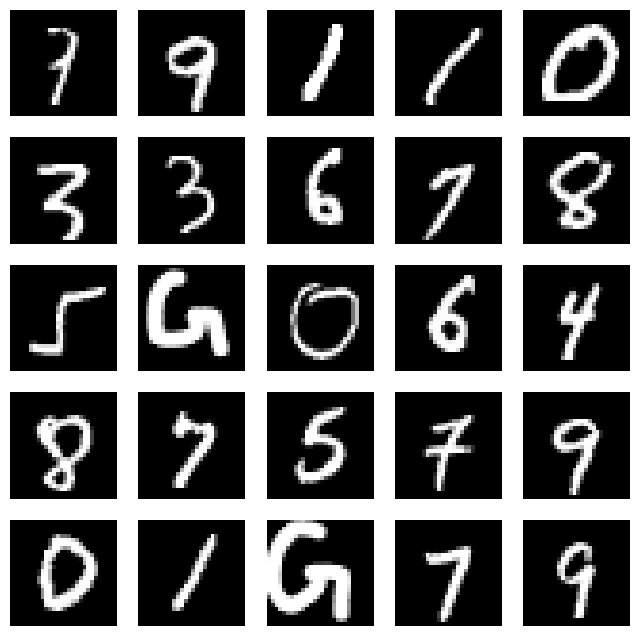

In [34]:
import matplotlib.pyplot as plt

# Reshape the images to 28x28 pixels
x_test_reshaped = x_test.reshape(-1, 28, 28)

# Plot the first 25 images in x_test
fig, axs = plt.subplots(5, 5, figsize=(8, 8))
for i in range(5):
    for j in range(5):
        axs[i, j].imshow(x_test_reshaped[i*5+j], cmap='gray')
        axs[i, j].axis('off')
plt.show()


so G letters copies added in mnist data set

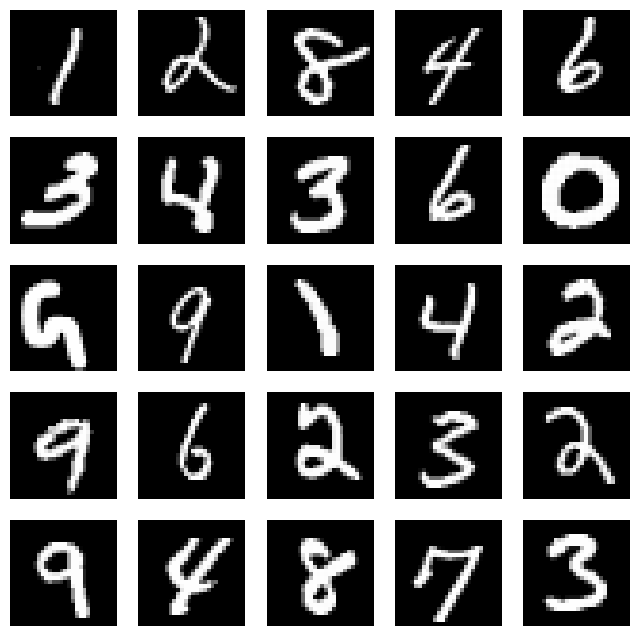

In [36]:
#lets check G letter present in mnist train data or not
# Reshape the images to 28x28 pixels
x_train_reshaped = x_train.reshape(-1, 28, 28)

# Plot the first 25 images in x_test
fig, axs = plt.subplots(5, 5, figsize=(8, 8))
for i in range(5):
    for j in range(5):
        axs[i, j].imshow(x_train_reshaped[i*5+j], cmap='gray')
        axs[i, j].axis('off')
plt.show()

New autoencoder, and training this autoencoder with the MNIST dataset and  with my new images added.

In [37]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 16 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 16)                1616      
                                                                 
 dense_4 (Dense)             (None, 100)               1700      
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

##Train the new autoencoder model.

In [38]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training


# Train the autoencoder with MNIST data
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
    x=x_train, # For autoencoders, both the input and the target are the same
    y=x_train, 
    epochs=10, 
    batch_size=128,
    shuffle=True, 
    validation_data=(x_test, x_test),
    callbacks=[early_stop]
)

Epoch 1/10
516/516 [==============================] - 21s 37ms/step - loss: 0.1808 - val_loss: 0.1308
Epoch 2/10
516/516 [==============================] - 20s 39ms/step - loss: 0.1250 - val_loss: 0.1189
Epoch 3/10
516/516 [==============================] - 19s 37ms/step - loss: 0.1169 - val_loss: 0.1134
Epoch 4/10
516/516 [==============================] - 21s 41ms/step - loss: 0.1126 - val_loss: 0.1103
Epoch 5/10
516/516 [==============================] - 19s 37ms/step - loss: 0.1098 - val_loss: 0.1090
Epoch 6/10
516/516 [==============================] - 20s 38ms/step - loss: 0.1078 - val_loss: 0.1067
Epoch 7/10
516/516 [==============================] - 19s 37ms/step - loss: 0.1060 - val_loss: 0.1056
Epoch 8/10
516/516 [==============================] - 20s 40ms/step - loss: 0.1038 - val_loss: 0.1030
Epoch 9/10
516/516 [==============================] - 20s 39ms/step - loss: 0.1019 - val_loss: 0.1014
Epoch 10/10
516/516 [==============================] - 19s 37ms/step - loss: 0.100

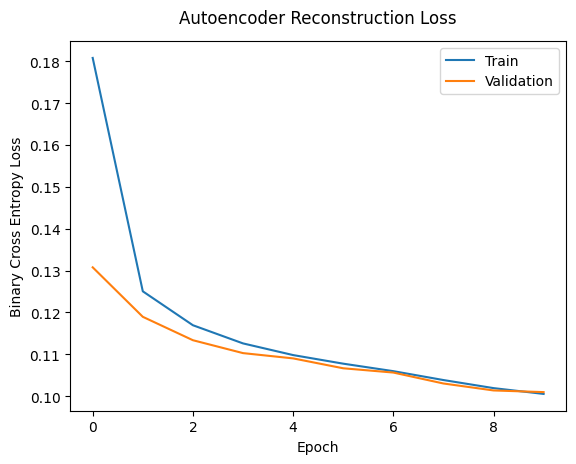

In [39]:
# Plot training and validation loss scores
# against the number of epochs.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Binary Cross Entropy Loss')
plt.xlabel('Epoch')
plt.title('Autoencoder Reconstruction Loss', pad=13)
plt.legend(loc='upper right')

**4. Demonstrate your new encoding by showing the autencoder recreate a random set of digits and your new character.**

Test the autoencoder model by reconstructing the test images and visually inspecting the results.

344/344 [==============================] - 2s 5ms/step


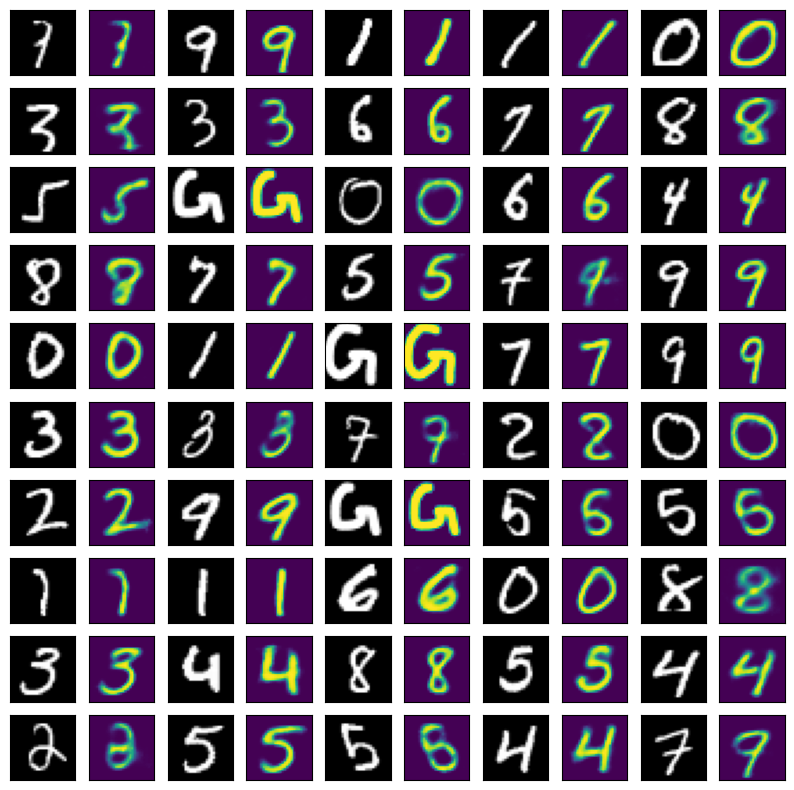

In [40]:
reconstructed_images = autoencoder.predict(x_test)

images = []
for i in range(100):
    images.append(x_test[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

**Lets Check how new encoder predict my letters**

1/1 [==============================] - 0s 22ms/step


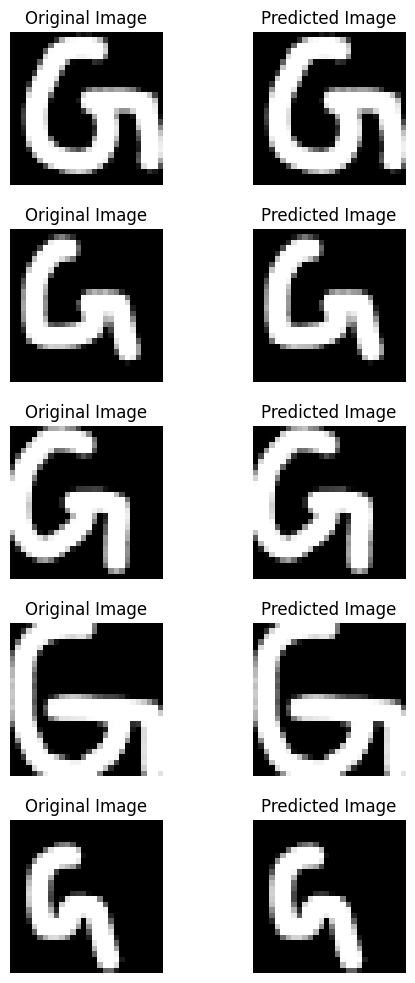

In [41]:
# Define the list of image paths
image_paths = ['G1.png', 'G2.png', 'G3.png', 'G4.png', 'G5.png']

# Set up the plot
fig, axs = plt.subplots(5, 2, figsize=(5, 10))
fig.tight_layout()

# Loop over the image paths
for i, path in enumerate(image_paths):
    # Load the image
    img = tf.keras.utils.load_img(path, target_size=(28, 28), color_mode='grayscale')

    # Preprocess the image
    input_arr = tf.keras.utils.img_to_array(img)
    input_arr = input_arr / 255.0
    input_arr = input_arr.reshape(784)
    input_arr = np.array([input_arr])

    # Make predictions
    predictions = autoencoder.predict(input_arr)

    # Display the images and predictions
    axs[i, 0].imshow(img, cmap='gray')
    axs[i, 0].axis('off')
    axs[i, 0].set_title('Original Image')
    axs[i, 1].imshow(predictions[0].reshape(28, 28), cmap='gray')
    axs[i, 1].axis('off')
    axs[i, 1].set_title('Predicted Image')

plt.show()

In [43]:
# Saving my new autoencoder model
autoencoder.save('new_trained_autoencoder.h5')

# **Analysis**

---



---



**From the plot, it appears that the new autoencoder is doing a good job of reconstructing the random digits and the added letter images. The reconstructed images appear to be quite similar to the original images, with only minor variations in some cases. The variations may be due to the limited capacity of the autoencoder or the presence of noise in the original images.**